In [2]:
%config Completer.use_jedi = False

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

In [4]:
def calculate_prec_recall_test_set(store_file_path):
    results = open(store_file_path,'r',)
    video_num_id = 0
    tp_id = 1
    fp_id = 2
    fn_id = 3
    tp_sum = 0
    fp_sum = 0
    fn_sum = 0
    lines = results.readlines()
    if len(lines)==0:
        return 0,0
    else:
        
        for line in lines:
            print(line)
            line_details = [x.strip() for x in line.split(",")]
            video_num = line_details[video_num_id]
            tp_sum += int(line_details[tp_id].strip())
            fp_sum += int(line_details[fp_id].strip())
            fn_sum += int(line_details[fn_id].strip())

        avg_prec = tp_sum / (tp_sum + fp_sum)
        avg_recall = tp_sum / (tp_sum + fn_sum)
        return avg_prec, avg_recall

In [5]:
store_file_path_main = "/data/medha/Bacteria/DataFeatures/collagen_motility_optical_flow_median_bkg_more_data/test_set_results"
precision = {}
recall = {}


### Step 1: Detection Individual Models

In [6]:
difficulty_level = "Motility-wiggle"
store_file_path = store_file_path_main + f"_{difficulty_level}.txt"
pr, rc = calculate_prec_recall_test_set(store_file_path)
print("Precision: ", pr)
print("Recall: ", rc)
precision["Low Motility Detector"] = pr
recall["Low Motility Detector"] = rc

141,371,1579,242

148,1255,1410,86

153,1043,1151,149

160,998,1961,466

167,906,1920,286

170,1334,1419,454

142,445,1859,151

146,1488,1283,596

149,1288,1088,351

154,789,1554,403

156,658,1605,236

161,1025,1612,314

166,721,2059,620

171,887,1699,305

214,894,1810,297

215,596,2389,298

Precision:  0.3576503795989877
Recall:  0.7366680032076984


In [7]:
difficulty_level = "Motility-mid"
store_file_path = store_file_path_main + f"_{difficulty_level}.txt"
pr, rc = calculate_prec_recall_test_set(store_file_path)
print("Precision: ", pr)
print("Recall: ", rc)
precision["Mid Motility Detector"] = pr
recall["Mid Motility Detector"] = rc

141,0,131,148

148,0,395,149

153,144,890,154

160,0,966,447

167,0,415,0

170,4,1104,592

142,0,143,149

146,136,351,162

149,0,454,0

154,0,956,0

156,0,1041,0

161,96,830,202

166,0,578,0

171,149,1033,149

214,0,629,0

215,0,552,0

Precision:  0.04810402837137401
Recall:  0.19731443491234613


In [8]:
difficulty_level = "Motility-high"
store_file_path = store_file_path_main + f"_{difficulty_level}.txt"
pr, rc = calculate_prec_recall_test_set(store_file_path)
print("Precision: ", pr)
print("Recall: ", rc)
precision["High Motility Detector"] = pr
recall["High Motility Detector"] = rc

141,1655,1025,801

148,0,114,0

153,121,375,224

160,46,380,103

167,120,35,29

170,348,457,247

142,934,1095,258

146,0,78,0

149,0,120,0

154,377,333,70

156,113,27,184

161,142,285,7

166,39,24,110

171,422,300,250

214,200,66,97

215,301,92,146

Precision:  0.5006234413965087
Recall:  0.6560457516339869


### Step 2: Detection Combination Model

In [9]:
store_file_path = store_file_path_main + f"_combined.txt" 
pr, rc = calculate_prec_recall_test_set(store_file_path)
print("Precision: ", pr)
print("Recall: ", rc)
precision["Multi-level Bacteria Detector"] = pr
recall["Multi-level Bacteria Detector"] = rc

141,2318,2443,1197

148,1630,1544,9

153,1747,1977,386

160,1827,2524,382

167,1175,2221,315

170,2327,2339,652

142,1515,2961,571

146,1935,1401,596

149,1548,1402,240

154,1685,2324,252

156,1321,2123,317

161,1482,2508,453

166,784,2637,706

171,2004,2486,605

214,1094,2505,394

215,981,2949,360

Precision:  0.41111849247371063
Recall:  0.7733784442818825


### Step 3: Filter on Predicted Bacteria Bounding Box Size

In [10]:
store_file_path = store_file_path_main + f"_filter_bbox.txt"
pr, rc = calculate_prec_recall_test_set(store_file_path)
print("Precision: ", pr)
print("Recall: ", rc)
precision["BBox Filter"] = pr
recall["BBox Filter"] = rc

141,2318,2439,1197

148,1630,1543,9

153,1747,1813,386

160,1827,2281,382

167,1175,2147,315

170,2327,2289,652

142,1515,2961,571

146,1935,1395,596

149,1548,1390,240

154,1685,2146,252

156,1321,1864,317

161,1482,2280,453

166,784,2515,706

171,1999,2319,610

214,1093,2276,395

215,981,2865,360

Precision:  0.4235598597428619
Recall:  0.7731955620580346


### Step 4: Filter on Predicted Bacteria Confidence Score

In [11]:
store_file_path = store_file_path_main + f"_filter_conf_score.txt" 
pr, rc = calculate_prec_recall_test_set(store_file_path)
print("Precision: ", pr)
print("Recall: ", rc)
precision["Confidence Score Filter"] = pr
recall["Confidence Score Filter"] = rc

141,1038,9,2477

148,584,161,1055

153,830,164,1303

160,631,403,1578

167,416,98,1074

170,780,283,2199

142,516,130,1570

146,801,125,1730

149,559,185,1229

154,1033,111,904

156,1018,207,620

161,616,448,1319

166,302,102,1188

171,932,232,1677

214,538,159,950

215,634,77,707

Precision:  0.7950715196147854
Recall:  0.34223360156059496


### Step 4: Filter using NMS

In [12]:
store_file_path = store_file_path_main + f"_filter_nms.txt" 
pr, rc = calculate_prec_recall_test_set(store_file_path)
print("Precision: ", pr)
print("Recall: ", rc)
precision["NMS Filter"] = pr
recall["NMS Filter"] = rc

141,1038,9,2477

148,584,160,1055

153,830,155,1303

160,631,402,1578

167,416,98,1074

170,780,283,2199

142,516,130,1570

146,801,125,1730

149,559,184,1229

154,1033,103,904

156,1018,172,620

161,616,448,1319

166,302,102,1188

171,932,231,1677

214,538,159,950

215,634,77,707

Precision:  0.7982368832646097
Recall:  0.34223360156059496


## Step 5: Tracking

In [13]:
store_file_path = store_file_path_main + f"_tracking.txt" 
pr, rc = calculate_prec_recall_test_set(store_file_path)
print("Precision: ", pr)
print("Recall: ", rc)
precision["Interpolated SORT"] = pr
recall["Interpolated SORT"] = rc

141,1919,155,1596

148,1074,343,565

153,1311,250,822

160,1068,923,1141

167,694,420,796

170,1449,559,1530

142,958,434,1128

146,1574,58,957

149,1130,157,658

154,1412,167,525

156,1135,408,503

161,925,889,1010

166,382,295,1108

171,1136,522,1473

214,986,484,502

215,776,384,565

Precision:  0.7354883701850105
Recall:  0.5464825652279932


### Step 6: Filter on Track length

In [14]:
store_file_path = store_file_path_main + f"_filter_track_length.txt" 
pr, rc = calculate_prec_recall_test_set(store_file_path)
print("Precision: ", pr)
print("Recall: ", rc)
precision["Track Length Filter"] = pr
recall["Track Length Filter"] = rc

141,1306,18,2209

148,993,297,646

153,1187,151,946

160,973,855,1236

167,635,335,855

170,1278,456,1701

142,646,250,1440

146,1356,118,1175

149,1022,157,766

154,1330,117,607

156,1128,243,510

161,848,859,1087

166,298,295,1192

171,1068,356,1541

214,936,405,552

215,723,179,618

Precision:  0.7554520126813334
Recall:  0.4793647890758352


In [33]:
precision

{'Low Motility Detector': 0.3576503795989877,
 'Mid Motility Detector': 0.04810402837137401,
 'High Motility Detector': 0.5006234413965087,
 'Multi-level Bacteria Detector': 0.41111849247371063,
 'BBox Filter': 0.4235598597428619,
 'Confidence Score Filter': 0.7950715196147854,
 'NMS Filter': 0.7982368832646097,
 'Interpolated SORT': 0.7354883701850105,
 'Track Length Filter': 0.77}

In [34]:
recall

{'Low Motility Detector': 0.7366680032076984,
 'Mid Motility Detector': 0.19731443491234613,
 'High Motility Detector': 0.6560457516339869,
 'Multi-level Bacteria Detector': 0.7733784442818825,
 'BBox Filter': 0.7731955620580346,
 'Confidence Score Filter': 0.34223360156059496,
 'NMS Filter': 0.34223360156059496,
 'Interpolated SORT': 0.5464825652279932,
 'Track Length Filter': 0.48}

In [16]:
data = pd.DataFrame(columns= ["precision", "recall", "step"])
for i, key in enumerate(precision.keys()):
    data_entry = {"precision":precision[key],"recall":recall[key], "step":key}
    data = data.append(data_entry, ignore_index=True)
data.reset_index(inplace=True)
#data

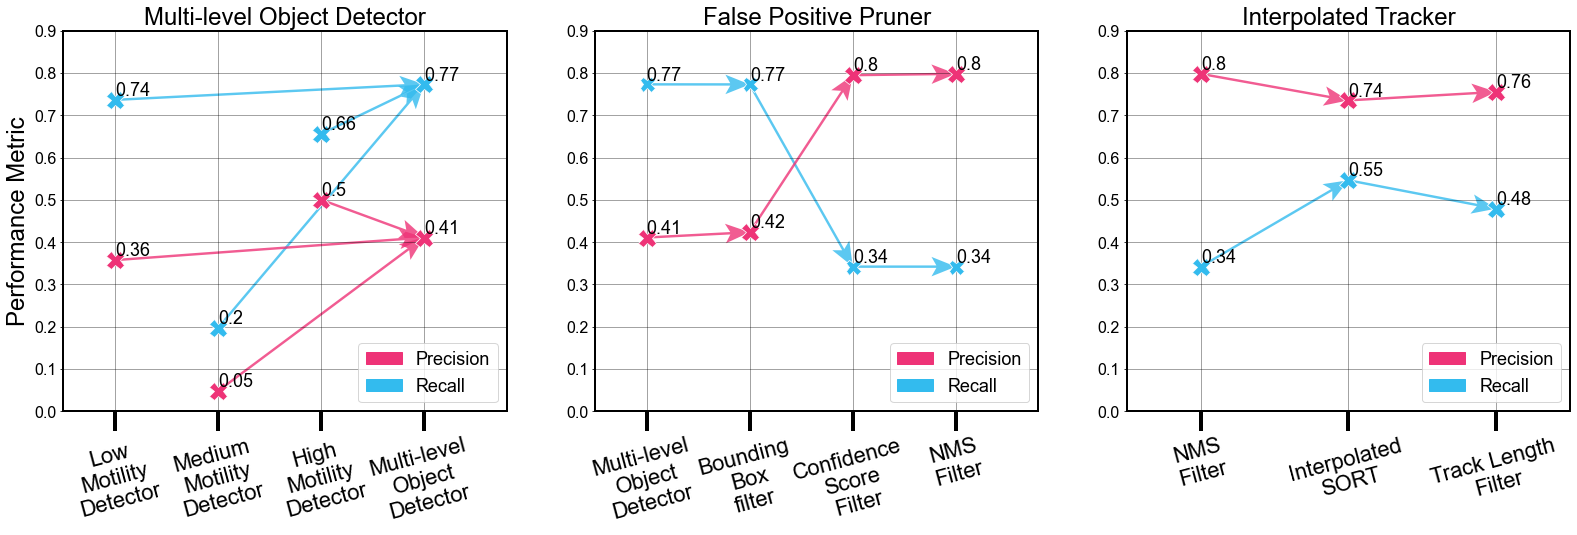

In [19]:
fig, ax = plt.subplots(1,3,figsize=(27,7))
plt.rcParams['xtick.major.size'] = 20
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.bottom'] = True

plt.rcParams["font.family"] = ["Arial"]

precision_colour = "#EE3377"
recall_colour = "#33BBEE"

precision_colour_line = precision_colour
precision_colour_marker = precision_colour

recall_colour_line = recall_colour
recall_colour_marker = recall_colour

precision_patch = mpatches.Patch(color=precision_colour, label="Precision")
recall_patch = mpatches.Patch(color=recall_colour, label="Recall")
l2_2 = ax[2].legend(handles=[precision_patch, recall_patch],loc="lower right", prop={'size': 18, 'family': "Arial"}, 
                title_fontsize=16)
l2_1 = ax[1].legend(handles=[precision_patch, recall_patch],loc="lower right", prop={'size': 18, 'family': "Arial"}, 
                title_fontsize=16)
l2_0 = ax[0].legend(handles=[precision_patch, recall_patch],loc="lower right", prop={'size': 18, 'family': "Arial"}, 
                title_fontsize=16)

markers1=['o', 'X', 's', "P"]
markers2=['P', 'D', '*', "v"]
markers3=['v', 'p', '^']

markers1= markers2= ['X', 'X', 'X', 'X']
markers3=['X', 'X', 'X']

x = np.array(range(len(list(precision.values()))))
y = (data["recall"].values)


# PART 1
x1 = x[:4]
y1 = y[:4]

#annotate values over markers
for px, py in zip(x1,y1):
    ax[0].text(px, py+0.01, round(py,2),size=18)
    
#shifted by 3 to skip the first 3 values in quiver plot    
#plt.quiver(x[3:-1], y[3:-1], x[4:]-x[3:-1], y[4:]-y[3:-1], scale_units='xy', angles='xy', scale=1,color="black",width=0.0055)

for i in range(3):
    ax[0].quiver(x1[i], y1[i], x1[3] - x1[i], y1[3] - y1[i], scale_units='xy',
                 angles='xy', scale=1, color=recall_colour_line, width=0.0055, alpha=0.8,
                 headwidth=8, headlength=10, headaxislength=8)

#plot markers
sns.lineplot(x = range(len(list(x1))), y=list(y1), data=data[:4],
             markers=markers1, style="step", color=recall_colour_marker, markersize=18, ax=ax[0])

legend_handles, labels= ax[0].get_legend_handles_labels()
###########################
x = np.array(range(len(list(recall.values()))))
y = (data["precision"].values)


# PART 1
x1 = x[:4]
y1 = y[:4]

#annotate values over markers
for px, py in zip(x1,y1):
    ax[0].text(px, py+0.01, round(py,2),size=18)
    
#shifted by 3 to skip the first 3 values in quiver plot    
#plt.quiver(x[3:-1], y[3:-1], x[4:]-x[3:-1], y[4:]-y[3:-1], scale_units='xy', angles='xy', scale=1,color="black",width=0.0055)

for i in range(3):
    ax[0].quiver(x1[i], y1[i], x1[3] - x1[i], y1[3] - y1[i], scale_units='xy',
                 angles='xy', scale=1, color=precision_colour_line, width=0.0055, alpha=0.8,
                 headwidth=8, headlength=10, headaxislength=8)

#plot markers
sns.lineplot(x = range(len(list(x1))), y=list(y1), data=data[:4],
             markers=markers1, style="step", color=precision_colour_marker,  markersize=18, ax=ax[0])

ax[0].legend(legend_handles, labels,loc='lower left',prop={'size': 16} ,title ="Steps", title_fontsize=16, markerscale=2)
ax[0].get_legend().remove()
################################

x = np.array(range(len(list(precision.values()))))
y = (data["recall"].values)

# PART 2
x1 = x[:4]
y1 = y[3:7]

#annotate values over markers
for px, py in zip(x1,y1):
    ax[1].text(px, py+0.01, round(py,2),size=18)
    
for i in range(len(x1)-1):
    ax[1].quiver(x1[i], y1[i], x1[i+1]-x1[i], y1[i+1]-y1[i], scale_units='xy',
                 angles='xy', scale=1, color=recall_colour_line, width=0.0055, alpha=0.8,
                 headwidth=8, headlength=10, headaxislength=8)



#plot markers
p1 = sns.lineplot(x = range(len(list(x1))), y=list(y1), data=data[3:7],
             markers=markers2, style="step", color=recall_colour_marker,  markersize=15, ax=ax[1])
legend_handles, labels= ax[1].get_legend_handles_labels()
############################

x = np.array(range(len(list(precision.values()))))
y = (data["precision"].values)

# PART 2
x1 = x[:4]
y1 = y[3:7]

#annotate values over markers
for px, py in zip(x1,y1):
    ax[1].text(px, py+0.01, round(py,2),size=18)
    
for i in range(len(x1)-1):
    ax[1].quiver(x1[i], y1[i], x1[i+1]-x1[i], y1[i+1]-y1[i], scale_units='xy',
                 angles='xy', scale=1, color=precision_colour_line, width=0.0055, alpha=0.8,
                 headwidth=8, headlength=10, headaxislength=8)



#plot markers
p1 = sns.lineplot(x = range(len(list(x1))), y=list(y1), data=data[3:7],
             markers=markers2, style="step",  markersize=18,color=precision_colour_marker, ax=ax[1])

ax[1].legend(legend_handles, labels,loc='lower left',prop={'size': 16} ,title ="Steps", title_fontsize=16, markerscale=2)
#######################
x = np.array(range(len(list(precision.values()))))
y = (data["recall"].values)
# PART 3
x1 = x[:3]
y1 = y[6:9]

#annotate values over markers
for px, py in zip(x1,y1):
    ax[2].text(px, py+0.01, round(py,2),size=18)
    
for i in range(len(x1)-1):
    ax[2].quiver(x1[i], y1[i], x1[i+1]-x1[i], y1[i+1]-y1[i], scale_units='xy',
                 angles='xy', scale=1, color=recall_colour_line, width=0.0055, alpha=0.8,
                 headwidth=8, headlength=10, headaxislength=8)



#plot markers
sns.lineplot(x = range(len(list(x1))), y=list(y1), data=data[6:9],
             style="step",  markersize=18,color=recall_colour_marker, ax=ax[2],markers=markers3)

legend_handles, labels= ax[2].get_legend_handles_labels()
#################
x = np.array(range(len(list(precision.values()))))
y = (data["precision"].values)
# PART 3
x1 = x[:3]
y1 = y[6:9]

#annotate values over markers
for px, py in zip(x1,y1):
    ax[2].text(px, py+0.01, round(py,2),size=18,family="Arial")
    
for i in range(len(x1)-1):
    ax[2].quiver(x1[i], y1[i], x1[i+1]-x1[i], y1[i+1]-y1[i], scale_units='xy',
                 angles='xy', scale=1, color=precision_colour_line, width=0.0055, alpha=0.8,
                 headwidth=8, headlength=10, headaxislength=8)



#plot markers
sns.lineplot(x = range(len(list(x1))), y=list(y1), data=data[6:9],
             style="step",  markersize=18,color=precision_colour_marker, ax=ax[2],markers=markers3)


ax[2].legend(legend_handles, labels,loc='lower left',prop={'size': 16} ,title ="Steps", title_fontsize=16, markerscale=2)
##############

# ax[0].set(ylim=(0.5, 1.02))
# ax[1].set(ylim=(0.5, 1.02))
# ax[2].set(ylim=(0.5, 1.02))

# ax[0].set(xlim=(-0.5, 4.02))
# ax[1].set(xlim=(-0.5, 4.02))
# ax[2].set(xlim=(-0.5, 4.02))

# ax[1].legend(loc='lower left',prop={'size': 15})
# ax[0].legend(loc='lower left',prop={'size': 15})
# ax[2].legend(loc='lower left',prop={'size': 15})

# fig.xlabel('Processing Steps',size=25,color="black")
# plt.ylabel('Metric',size=25,color="black")
# plt.yticks(size = 16,color="black")

for ax_num in range(0,3):
    ax[ax_num].set_xticks([])
    ax[ax_num].grid("on", alpha=0.45, color="black")
    #ax[ax_num].legend(loc='lower left',prop={'size': 15})
    ax[ax_num].set(xlim=(-0.5, 3.8))
    ax[ax_num].set(ylim=(0.0, 0.9))
    ax[ax_num].yaxis.set_tick_params(labelsize=16, color="black")
ax[2].set(xlim=(-0.5, 2.5))    
ax[0].set_title("Multi-level Object Detector",fontsize=24, family="Arial")
ax[1].set_title("False Positive Pruner",fontsize=24, family="Arial")
ax[2].set_title("Interpolated Tracker",fontsize=24, family="Arial")
#fig.suptitle("Collagen",fontsize=28, y=1.01)


#ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()

ax[2].add_artist(l2_2)
ax[1].add_artist(l2_1)
ax[0].add_artist(l2_0)
ax[0].set_ylabel('Performance Metric',fontsize=24, family="Arial")

ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels(["Low\nMotility\nDetector","Medium\nMotility\nDetector","High\nMotility\nDetector","Multi-level\nObject\nDetector"], fontsize=22, rotation=15, family="Arial")

ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels(["Multi-level\nObject\nDetector","Bounding\nBox\nfilter","Confidence\nScore\nFilter","NMS\nFilter"], fontsize=22, rotation=15, family="Arial")

ax[2].set_xticks([0,1,2])
ax[2].set_xticklabels(["NMS\nFilter", "Interpolated\nSORT", "Track Length\nFilter"], fontsize=22, rotation=15, family="Arial")


#plt.tight_layout()

#plt.show()

# Saving the figure.
plt.savefig("prec_rec_quiver_collagen_markerx_colour_blind.png", bbox_inches="tight", dpi=600)